In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn


import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_lib
import mnist_vae_lib
import common_utils

# Load data

In [2]:
train_set, test_set = mnist_data_lib.get_mnist_dataset(propn_sample=0.005)

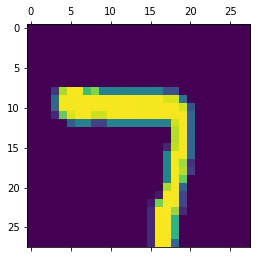

In [3]:
plt.matshow(train_set[0]['image'])

In [4]:
slen = train_set[0]['image'].shape[0]

# Get data loaders

In [5]:
batchsize = 20

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [6]:
for batch_idx, d in enumerate(train_loader):
    train_data = d
    break
    
for batch_idx, d in enumerate(test_loader):
    test_data = d
    break

# Define VAE

In [7]:
latent_dim = 5
n_classes = 10

In [8]:
vae = mnist_vae_lib.HandwritingVAE(latent_dim = latent_dim, 
                                    n_classes = n_classes)

In [9]:
# Load results

enc_file = "../mnist_vae_results_aws/mnist_vae_semisupervised_alpha1_enc_final"
dec_file = '../mnist_vae_results_aws/mnist_vae_semisupervised_alpha1_dec_final'

vae.encoder.load_state_dict(torch.load(enc_file,
                               map_location=lambda storage, loc: storage))

vae.decoder.load_state_dict(torch.load(dec_file,
                               map_location=lambda storage, loc: storage))

vae.eval()

HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=19, bias=True)
  )
  (decoder): MLPConditionalDecoder(
    (fc1): Linear(in_features=15, out_features=784, bias=True)
    (fc2): Linear(in_features=784, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=1568, bias=True)
  )
)

In [10]:
print(vae.parameters)

<bound method Module.parameters of HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=19, bias=True)
  )
  (decoder): MLPConditionalDecoder(
    (fc1): Linear(in_features=15, out_features=784, bias=True)
    (fc2): Linear(in_features=784, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=1568, bias=True)
  )
)>


In [33]:
loss_array = np.loadtxt('../mnist_vae_results_aws/mnist_vae_semisupervised_alpha1loss_array.txt')

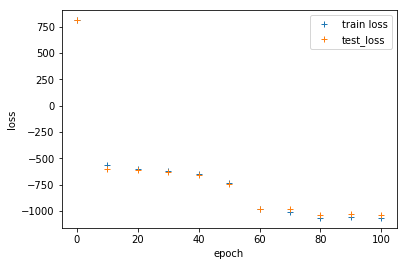

In [39]:
plt.plot(loss_array[0, :], loss_array[1, :], '+')
plt.plot(loss_array[0, :], loss_array[2, :], '+')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(('train loss', 'test_loss'))

In [11]:
num_images = train_loader.dataset.__len__()

In [20]:
vae.eval_vae(train_loader)

tensor(-1155.3110)

In [21]:
vae.eval_vae(test_loader)

tensor(-243.5960)

In [22]:
# check a few train images

In [23]:
latent_means, latent_std, latent_samples, class_weights = \
    vae.encoder_forward(train_data['image'])

z_ind = torch.argmax(class_weights, dim = 1)
    
image_mu, image_std = vae.decoder_forward(latent_means, z_ind)

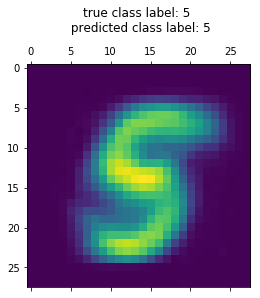

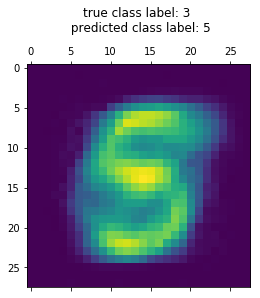

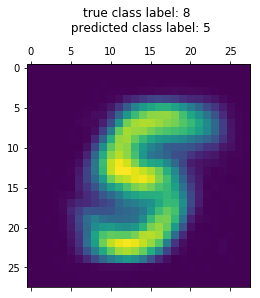

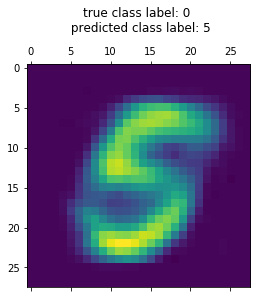

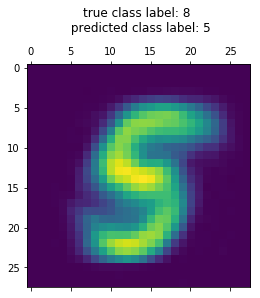

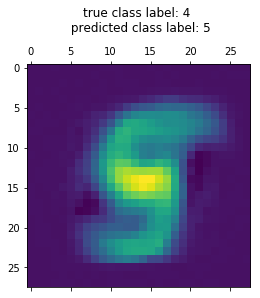

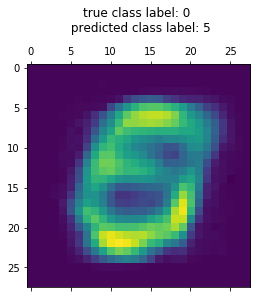

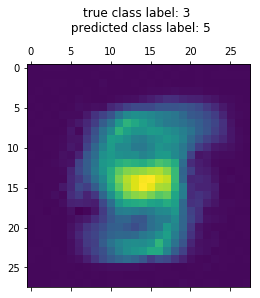

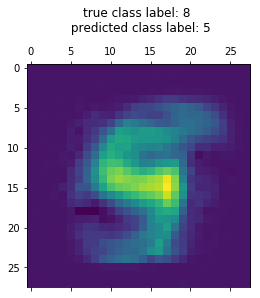

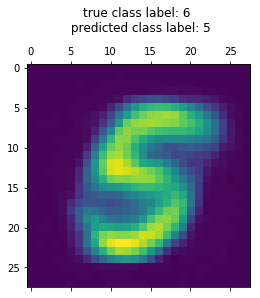

In [26]:
for i in range(10): 
    plt.matshow(image_mu[i, :, :].detach())
    plt.title('true class label: {} \n predicted class label: {}\n'.format(train_data['label'][i], z_ind[i]))

In [27]:
# check a few test images 

In [28]:
latent_means, latent_std, latent_samples, class_weights = \
    vae.encoder_forward(test_data['image'])

z_ind = torch.argmax(class_weights, dim = 1)

image_mu, image_std = vae.decoder_forward(latent_means, z_ind)

In [29]:
class_weights

tensor([[ 6.9951e-05,  6.5915e-05,  2.6286e-04,  4.7019e-05,  4.8658e-05,
          9.9838e-01,  2.4744e-05,  3.8684e-07,  1.1043e-03,  6.5884e-07],
        [ 9.3205e-06,  9.2795e-06,  2.0071e-03,  7.4434e-05,  7.1611e-05,
          9.9754e-01,  5.5550e-05,  2.9971e-09,  2.2996e-04,  8.4366e-08],
        [ 9.6017e-05,  5.9120e-05,  3.1931e-04,  5.9559e-05,  2.9583e-05,
          9.9803e-01,  3.1997e-05,  1.4311e-07,  1.3785e-03,  5.7264e-07],
        [ 1.8444e-04,  6.3494e-05,  9.4458e-05,  9.6253e-05,  3.2037e-04,
          9.9766e-01,  5.5962e-06,  1.8268e-04,  1.3725e-03,  2.3753e-05],
        [ 2.6502e-04,  1.0295e-04,  3.6937e-04,  2.3947e-04,  6.3516e-05,
          9.9623e-01,  3.0020e-05,  2.6525e-06,  2.6936e-03,  4.9665e-06],
        [ 3.9610e-05,  1.1099e-05,  2.4150e-05,  5.0316e-04,  1.0285e-02,
          6.0036e-01,  1.0661e-07,  3.8676e-01,  2.3064e-04,  1.7877e-03],
        [ 6.7249e-04,  3.7885e-05,  2.8437e-05,  2.7376e-04,  1.6190e-03,
          7.6222e-01,  8.7450e-0

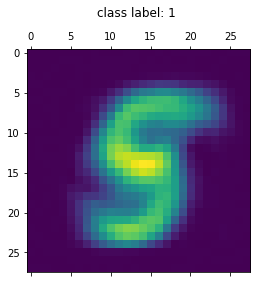

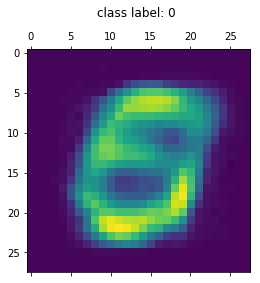

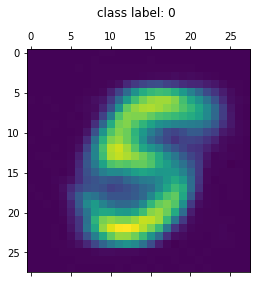

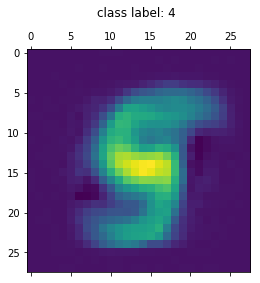

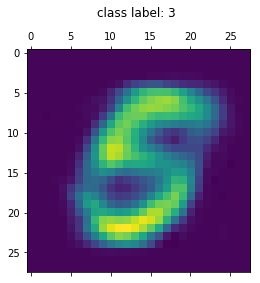

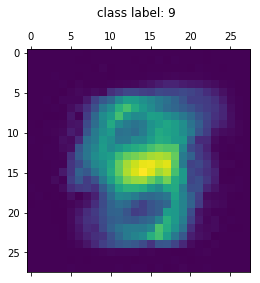

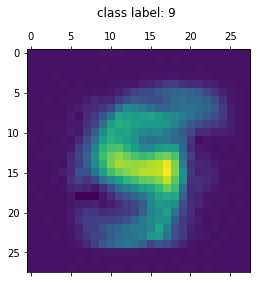

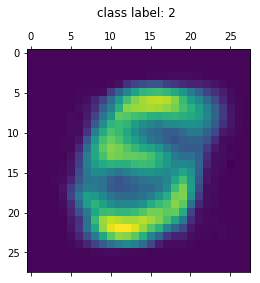

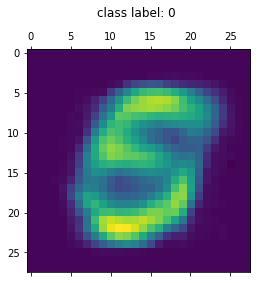

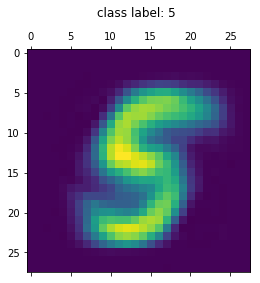

In [30]:
for i in range(10): 
    plt.matshow(image_mu[i, :, :].detach())
    plt.title('class label: {} \n'.format(test_data['label'][i]))